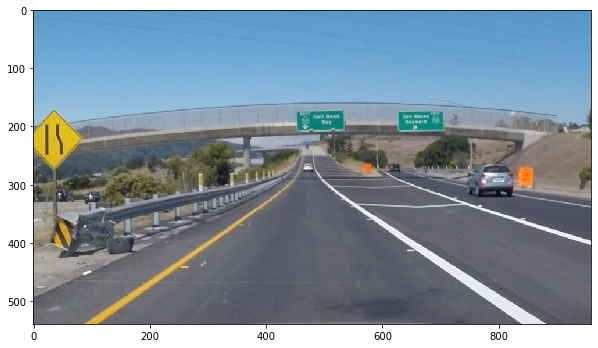

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('exit-ramp.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image,interpolation='nearest')

In [3]:
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY);
kernel_size=5;
blur_gray=cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [4]:
low_threshold=50
high_threshold=150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

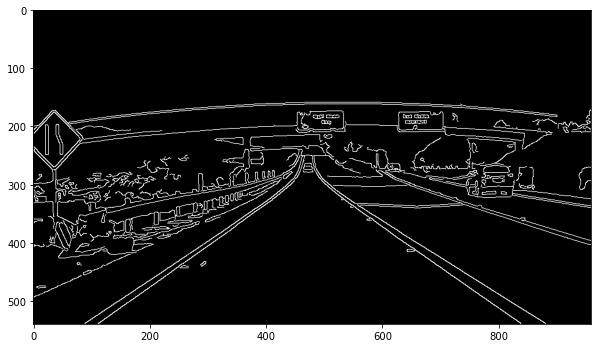

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(edges,cmap='Greys_r')

In [17]:
line_image=np.copy(image)*0
rho=1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1

In [18]:
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)# running hough 
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
color_edges = np.dstack((edges, edges, edges)) 

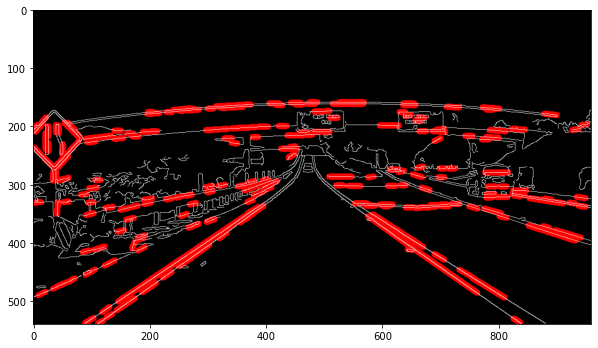

In [20]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.figure(figsize=(10,10))
plt.imshow(combo)